In [1]:
import pandas as pd

In [2]:
path = r"E:\coding\CSV\spam.csv"

df = pd.read_csv(path)

df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.rename(columns={"Category" : "spam", "Message" : "Body"}, inplace=True)

In [14]:
df.replace({"spam": 1, "ham": 0}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   int64 
 1   Body    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Body, df.spam, test_size=0.25)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [8]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb_model2", MultinomialNB())
])

In [9]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb_model2', MultinomialNB())])

In [10]:
clf.score(X_test, y_test)

0.9798994974874372

In [11]:
from sklearn.tree import DecisionTreeClassifier

DTC = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("DTC", DecisionTreeClassifier())
])

DTC.fit(X_train, y_train)
DTC.score(X_test, y_test)

0.964824120603015

In [12]:
import matplotlib.pyplot as plt
from sklearn import metrics

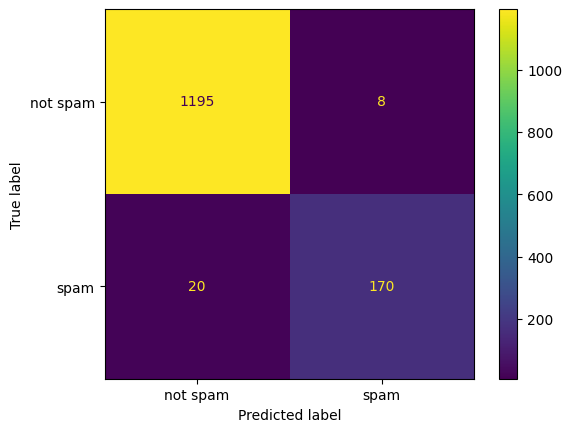

In [13]:
actual = y_test
predicted = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["not spam", "spam"])

cm_display.plot()
plt.show()